In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

# Load the dataset
CreditRisk_data = pd.read_csv("/content/drive/MyDrive/Mining/CA2_Credit_risk_dataset.csv")

# Explore the first 10 rows of the dataset
CreditRisk_data.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Check for the number of rows as values and columns as variables in the dataset
CreditRisk_data.shape

(32581, 12)

This shows that datset has 12 column and 32581 records

In [ ]:
# Check for duplicates in the dataset
CreditRisk_data.duplicated().sum()

165

Remove duplicate value

In [27]:
# Check for duplicates in the dataset
print(f"Number of duplicate rows before removal: {CreditRisk_data.duplicated().sum()}")

# Remove duplicates from the dataset
CreditRisk_data = CreditRisk_data.drop_duplicates()

# Verify if duplicates are removed
print(f"Number of duplicate rows after removal: {CreditRisk_data.duplicated().sum()}")

Number of duplicate rows before removal: 165
Number of duplicate rows after removal: 0


In [6]:
# Check for the columns in the dataset
credit_col_name = CreditRisk_data.columns
credit_col_name

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
# Check for missing values in the dataset
credit_null = CreditRisk_data.isnull().sum().sort_values(ascending=False)
credit_null

,0
loan_int_rate,3116
person_emp_length,895
person_age,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_status,0
loan_percent_income,0


In [7]:
# Show the overview of Statistical properties of the numerical variables.
round(CreditRisk_data.describe(),1) #set to a decimal point

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.0,32581.0,31686.0,32581.0,29465.0,32581.0,32581.0,32581.0
mean,27.7,66074.8,4.8,9589.4,11.0,0.2,0.2,5.8
std,6.3,61983.1,4.1,6322.1,3.2,0.4,0.1,4.1
min,20.0,4000.0,0.0,500.0,5.4,0.0,0.0,2.0
25%,23.0,38500.0,2.0,5000.0,7.9,0.0,0.1,3.0
50%,26.0,55000.0,4.0,8000.0,11.0,0.0,0.2,4.0
75%,30.0,79200.0,7.0,12200.0,13.5,0.0,0.2,8.0
max,144.0,6000000.0,123.0,35000.0,23.2,1.0,0.8,30.0


Person’s Age:

The dataset shows that the ages of individuals range from 20 to 144 years, although the upper value suggests the presence of outliers or incorrect data. The average age is 27.7 years, with most individuals falling between 23 and 30 years. The median age is 26 years, which indicates that the dataset primarily represents younger individuals.

  Person’s Income:
  
Income levels vary widely, from 4,000 to 6,000,000 units, highlighting significant outliers. The average income is 66,074.8 units, while the median income is 55,000 units. The majority of individuals earn between 38,500 to 79,200 units, suggesting that income distribution is skewed due to a few extremely high incomes.

Person’s Employment Length

The employment length data has missing values, with only 31,686 entries available. The average employment length is 4.8 years, and the median is 4 years. However, the range of values, 0 to 123 years, indicates unrealistic entries, suggesting the need for data cleaning.

Loan Amount

The loan amounts range from 500 to 35,000 units, with an average of 9,589.4 units. The median loan amount is 8,000 units, and most loans are between 5,000 to 12,200 units. This indicates that the loan amounts are generally small to medium-sized.

Loan Interest Rate

Interest rates range from 5.4% to 23.2%, with an average of 11%. The median interest rate is also 11%, indicating that the rates are fairly consistent for most loans, with a few exceptions at the higher end.

Loan Status

The loan status column has binary values, where 0 likely represents a negative outcome and 1 a positive outcome. The average value of 0.2 suggests that only 20% of the loans have a positive status, while the majority (about 80%) are negative.

Loan Percent Income

The loan percent income metric shows that loans are generally 10% to 80% of a person’s income, with an average of 20%. This indicates that loans are relatively affordable for most individuals in relation to their income levels.

Credit History Length

The length of credit history ranges from 2 to 30 years, with an average of 5.8 years and a median of 4 years. Most individuals have short credit histories, typically between 3 and 8 years, reflecting a younger demographic with less financial history.


In [13]:
# Show the total number of values, the unique values, the most frequent value(top) and its frequency for all categorical features
CreditRisk_data.describe(include="object")

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


As we can see here,
1.	person_home_ownership:

	•	This feature indicates the type of home ownership of the  applicant.

	•	There are 4 unique categories: RENT, MORTGAGE, OWN, and OTHER.

	•	The most frequent category is RENT, with 16,446 occurrences.

	•	Insight: A majority of applicants live in rented homes, indicating that they may not have significant home equity.
2.	loan_intent:

	•	This feature describes the purpose for which the loan is being requested.

	•	There are 6 unique categories, including EDUCATION, MEDICAL, DEBT CONSOLIDATION, and others.

	•	The most frequent loan purpose is EDUCATION, with 6,453 occurrences.

	•	Insight: Education is the leading reason for loan applications, reflecting borrowers’ financial priorities toward personal or professional growth.
3.	loan_grade:

	•	This feature represents the loan’s credit grade, which reflects the borrower’s creditworthiness.

	•	There are 7 unique categories: A, B, C, D, E, F, and G.

	•	The most common grade is A, with 10,777 occurrences.

	•	Insight: A large proportion of loans fall under Grade A, indicating a lower credit risk for most borrowers.
4.	cb_person_default_on_file:

	•	This feature indicates whether the applicant has a previous credit default on file.

	•	There are 2 unique categories: Y (Yes) and N (No).

	•	The most frequent category is N (No Default), with 26,836 occurrences.

	•	Insight: The majority of applicants (82.4%) have no history of defaults, reflecting a financially responsible borrower base.

In [15]:
# Create a dataframe to store the  numerical variables and their values
credit_num = CreditRisk_data.select_dtypes(include=["int64", "float64"])
print(credit_num.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  
0            1                 0.59                           3  
1            0                 0.10                           2  
2            1                 0.57                           3  
3            1                 0.53                           2  
4            1                 0.55                           4  


**EDA Visualisation**

**1. HeatMap**

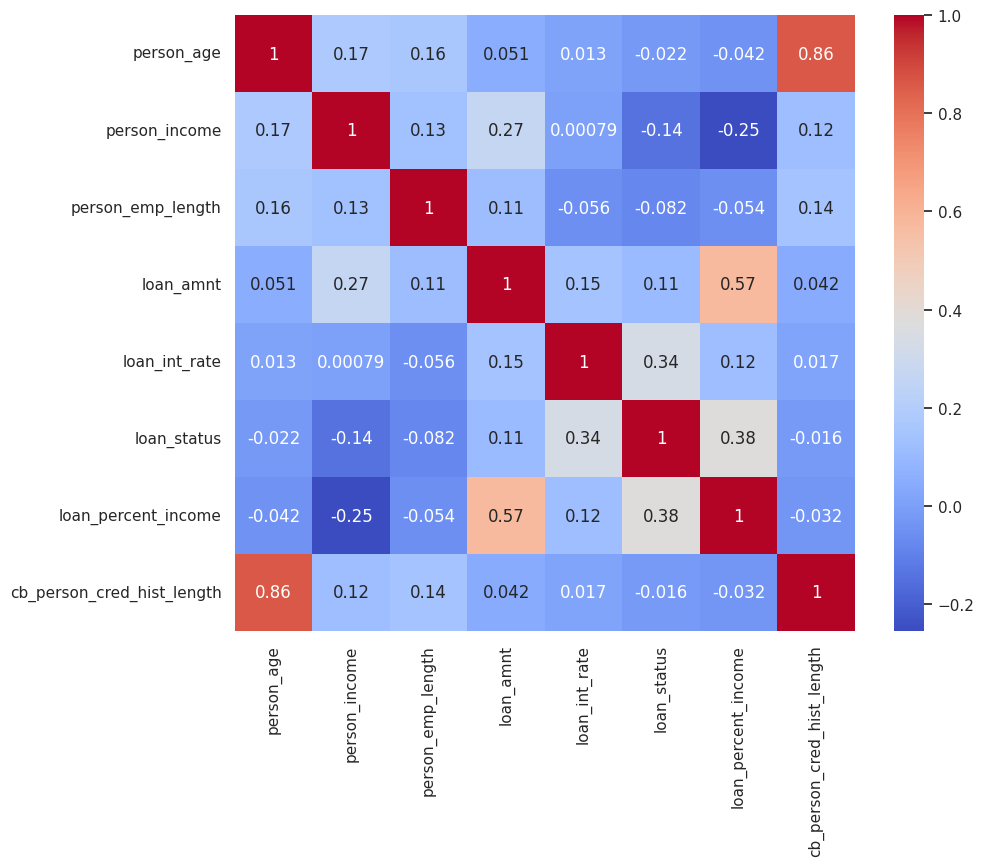

In [16]:
###EDA VISUALIZATION
# Plot a heatmap for the numerical variables in the dataset to show correlation between numerical variables in the dataset

sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(credit_num.corr(), annot=True, cmap="coolwarm")
plt.show()

This heatmap visually represents the correlation coefficients between the numerical variables in the dataset. The correlation values range from -1 to 1:

As we can see here,

1.	Strong Positive Correlations:

	•	person_age and cb_person_cred_hist_length (0.86):
This indicates that older individuals tend to have longer credit history lengths.

	•	loan_amnt and loan_percent_income (0.57):
Loan amounts are positively related to the percentage of income used for loans.

2.	Moderate Positive Correlations:

	•	loan_status and loan_int_rate (0.34):
Loan status (e.g., approved/rejected) shows a moderate positive relationship with loan interest rates.

	•	person_income and loan_amnt (0.27):
Individuals with higher income tend to take larger loan amounts.
3.	Negative Correlations:

	•	person_income and loan_percent_income (-0.25):
Higher incomes lead to a lower percentage of income being allocated to loans.

	•	loan_status and person_income (-0.14):
Loan status has a slight negative correlation with income, suggesting that higher-income individuals may face fewer rejections.
4.	Near-Zero Correlations:

	•	Variables like loan_int_rate and person_income (0.00079) or loan_status and person_age (-0.022) show very weak or negligible relationships.

**2. Histogram**

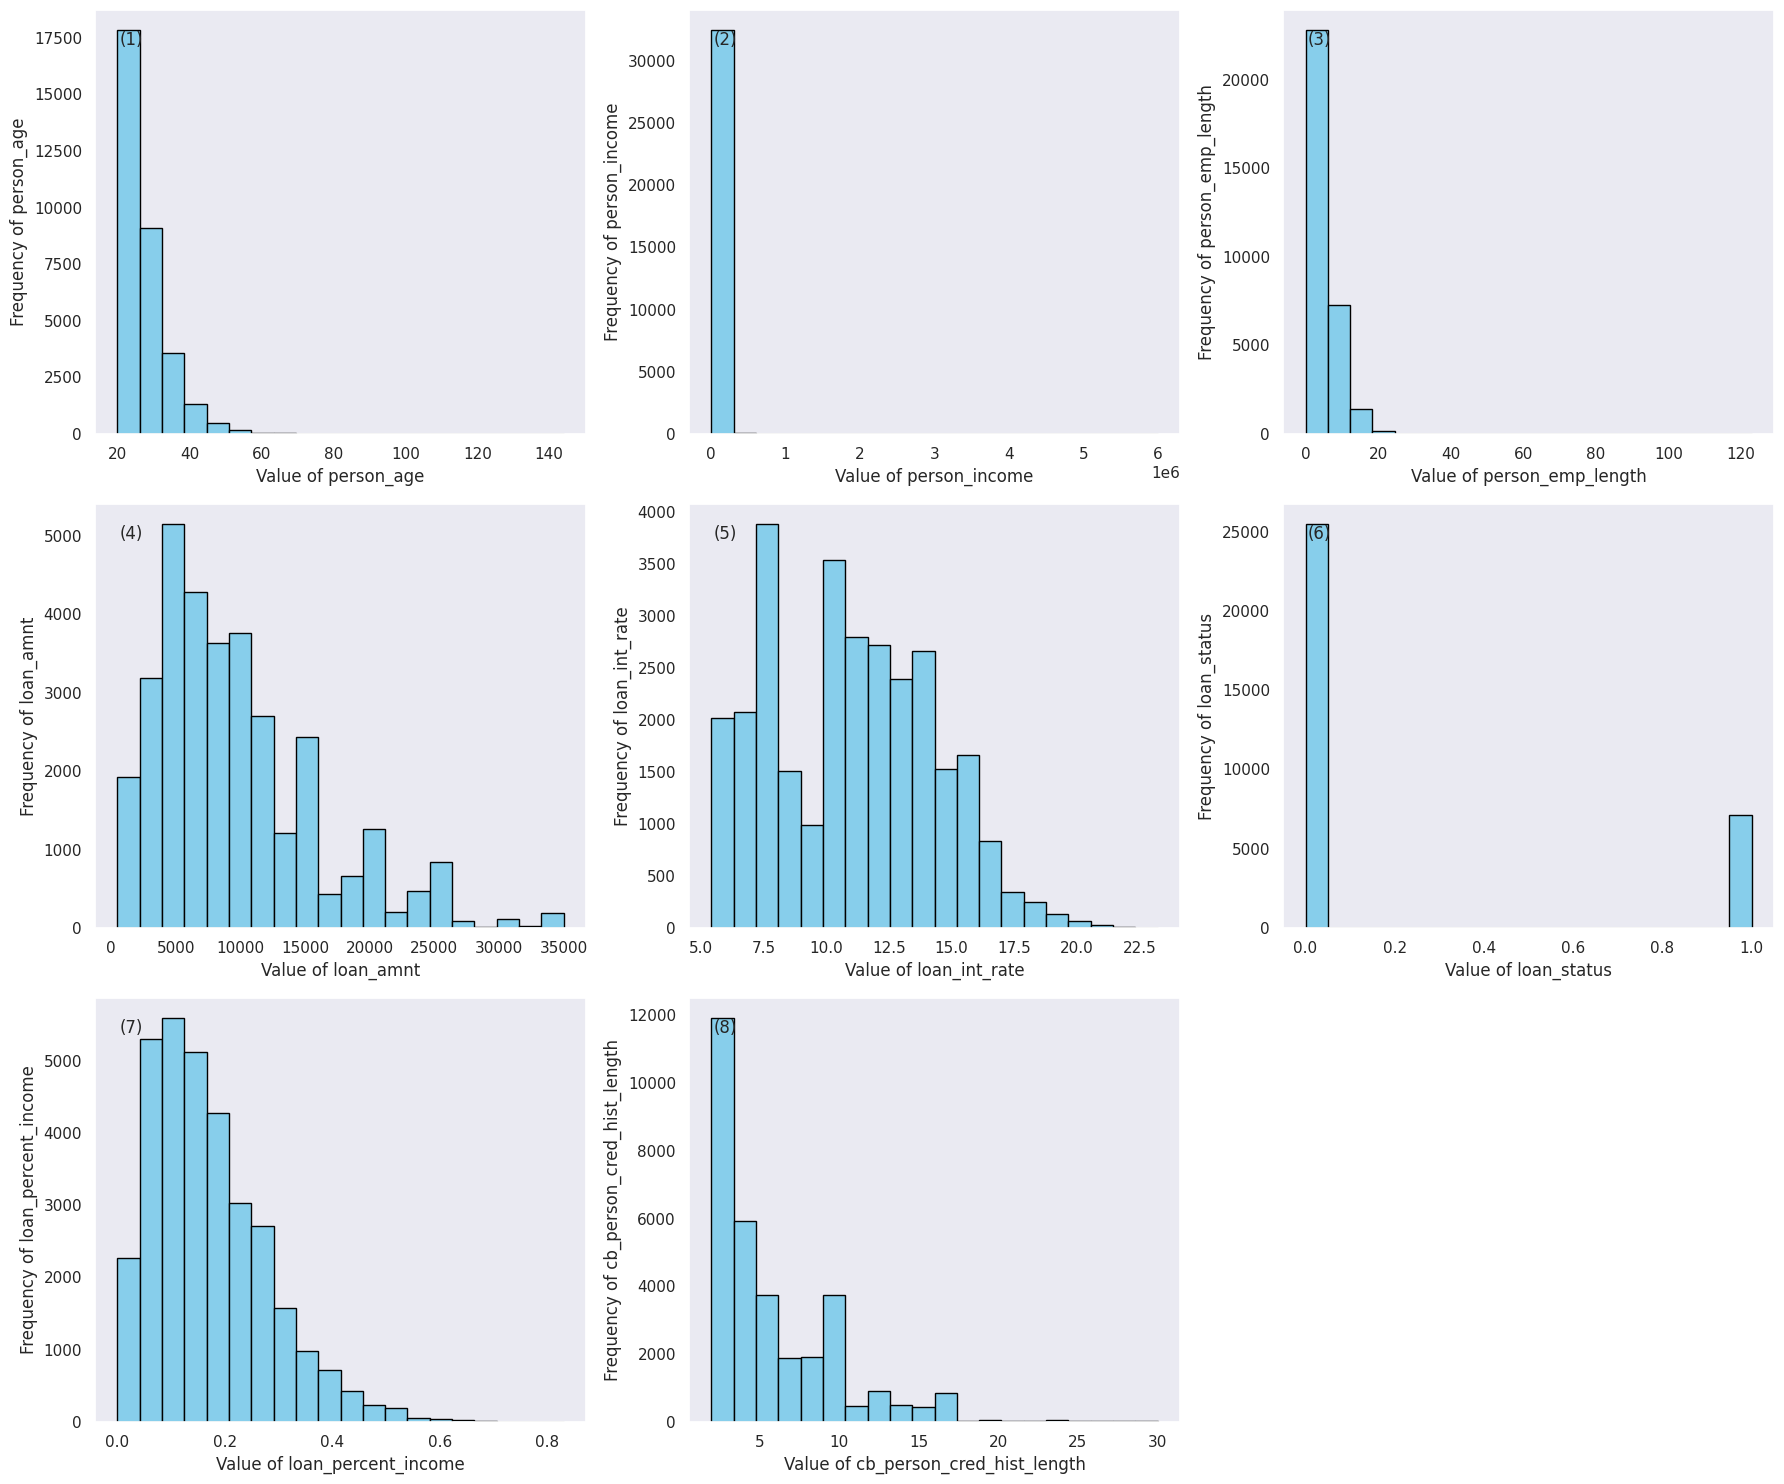

In [17]:
### EDA VISUALIZATIONS
#put the list of numerical columns into the num_columns variable
num_columns = credit_num.columns

#calculate the number of rows needed for the subplot grid
num_row = len(num_columns) // 3 + (len(num_columns) % 3 > 0)

#Put the number of columns for the subplot grid to be shown
num_col = 3

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(18,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a histogram for each column
for a, column in enumerate(num_columns):
    ax = axes[a]    #get the current axis using index a

    #plot the histogram for the current column
    ax.hist(credit_num[column], bins=20, color='skyblue', edgecolor='black')

    #Label the x-axis as value of the column name
    ax.set_xlabel(f"Value of {column}")

    #Label the y-axis as Frequency of the column name
    ax.set_ylabel(f"Frequency of {column}")

    #add text annotation for subplot index
    ax.text(0.05,0.95, f"({a+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

    #Remove grid lines
    ax.grid(False)

#Remove any unused subplots to avoid showing empty plots
for i in range(len(num_columns), num_col * num_row):
    fig.delaxes(axes[i])

#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

The histograms show the distribution of key numerical variables in the dataset:

1.	Person Age: Most individuals are between 20–40 years, with a steep drop after 40.
2.	Person Income: Income is highly skewed, with most individuals earning below 1 million and few extreme high values.

3.	Person Employment Length: Majority have employment lengths between 0–10 years, with a small number showing unrealistic high values.

4.	Loan Amount: Loan amounts are concentrated around 5,000–15,000 units, indicating smaller to mid-sized loans.

5.	Loan Interest Rate: Interest rates range from 5–20%, with most loans having rates between 10–15%.

6.	Loan Status: The majority of loans are labeled as 0 (negative status), with fewer in the 1 (positive status) category.

7.	Loan Percent Income: Most individuals allocate 10–30% of their income toward loans.

8.	Credit History Length: Credit history is concentrated between 2–10 years, with fewer individuals having histories exceeding 15 years.

In [ ]:
# Create a dataframe to store the  categorical variables and their values
credit_cat = CreditRisk_data.select_dtypes(include=["object"])
credit_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


**3. Pie Chart**

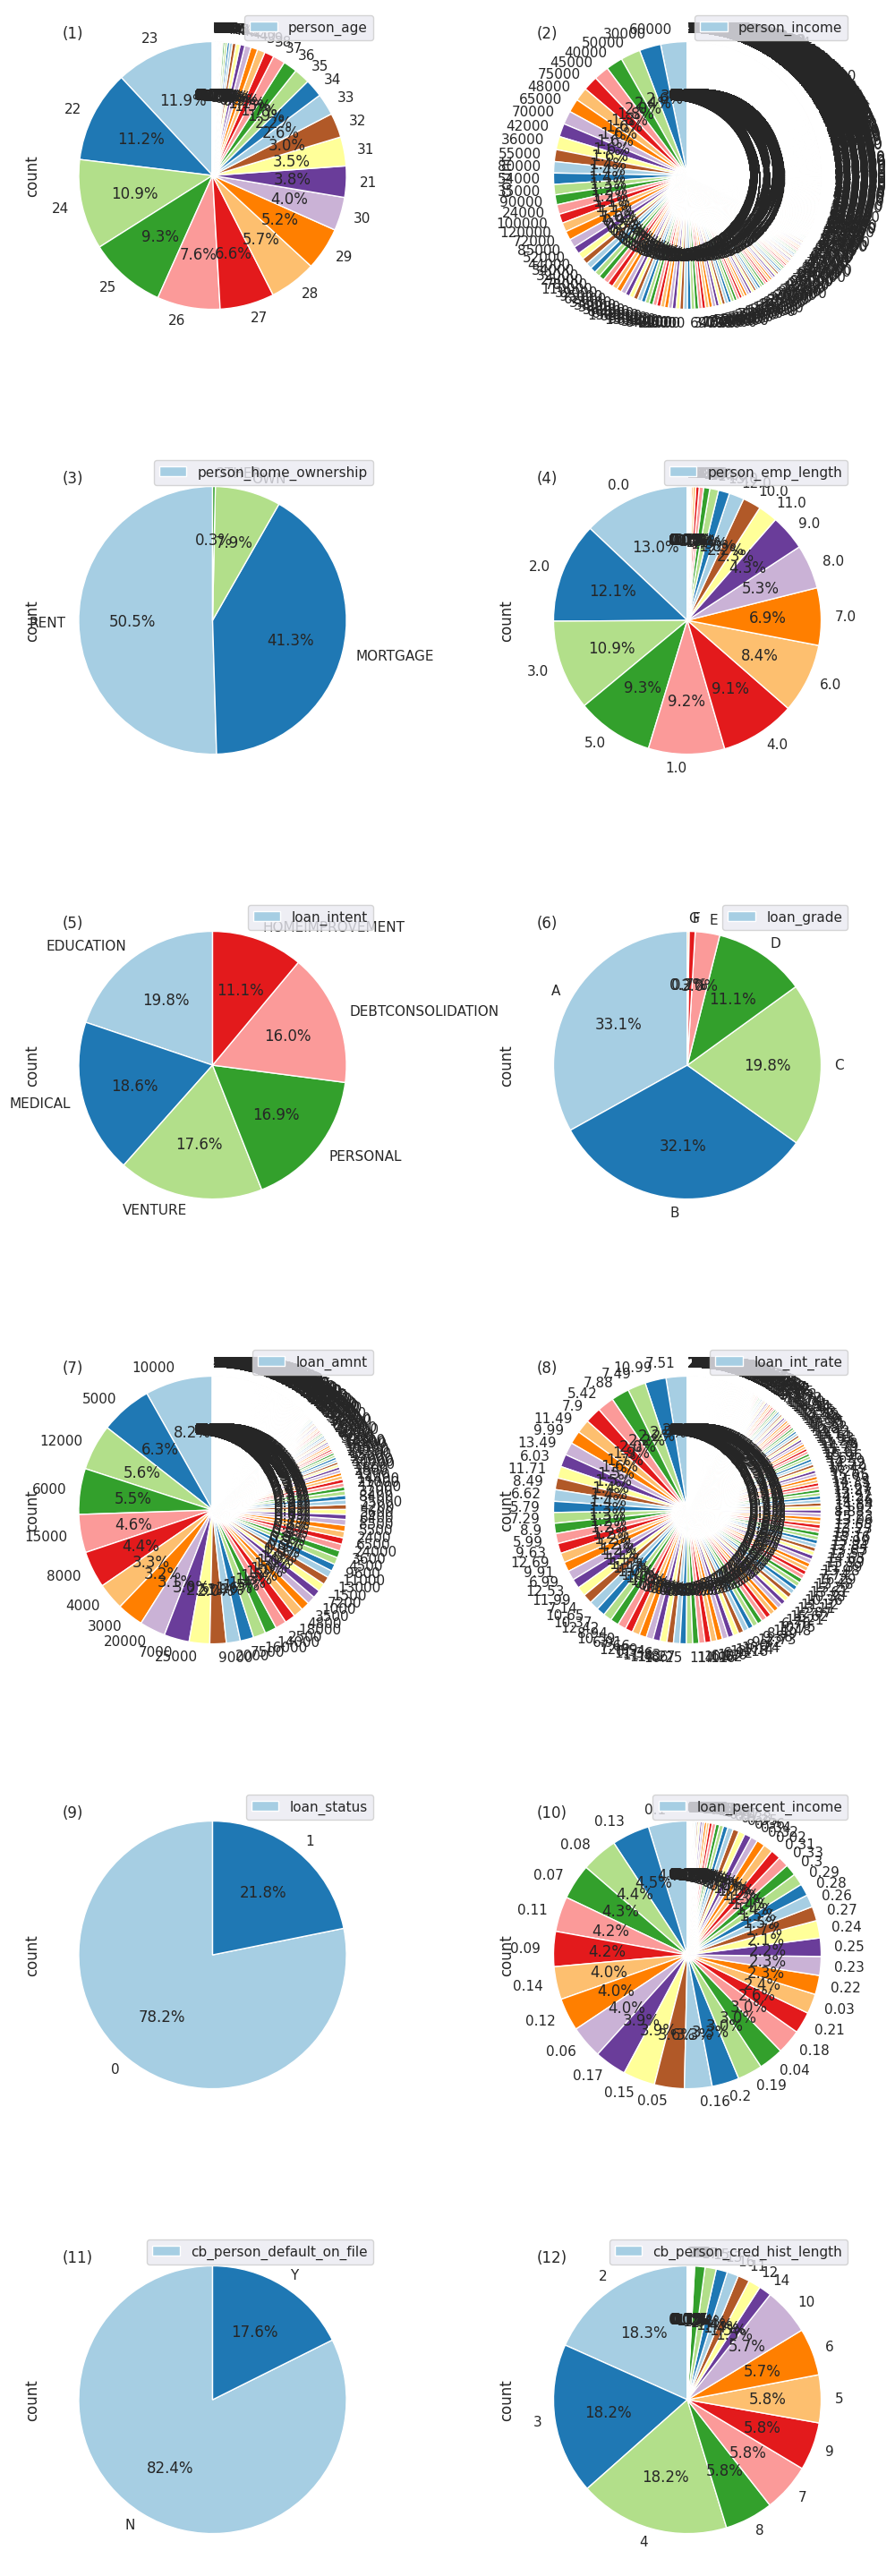

In [18]:
### EDA VISUALIZATIONS
#put the list of categorical columns into the cat_columns variable
cat_columns = CreditRisk_data.columns

#calculate the number of rows needed for the subplot grid
cat_row = len(cat_columns) // 2 + (len(cat_columns) % 2 > 0)

#Put the number of columns for the subplot grid to be shown
cat_col = 2

#Create a figure and axes of subplots
fig, axes = plt.subplots(cat_row, cat_col, figsize=(10,5*cat_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each categorical column and create a pie chart for each column
for b, column in enumerate(cat_columns):
    ax = axes[b]    #get the current axis using index b

    #calculate the count of values for the categorical column
    cat_value = CreditRisk_data[column].value_counts()

    #plot the pie chart for the current column
    cat_value.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, labels=cat_value.index)

    #Add Legend to each column
    ax.legend([column], loc='upper right')

    #add text annotation for subplot index
    ax.text(0.05,0.95, f"({b+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

    #Remove grid lines
    ax.grid(False)


#Remove any unused subplots to avoid showing empty plots
for i in range(len(cat_columns), cat_col * cat_row):
    fig.delaxes(axes[i])

#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

The above pie chart shows that,

1.	Person Age (Chart 1):

	•	The age distribution shows most individuals are concentrated between 23 and 27 years, with each age group contributing around 9–12%.

	•	Insight: The dataset is dominated by younger individuals, likely early in their careers or financial journeys.
2.	Person Income (Chart 2):

	•	Income values are highly spread out, with a large concentration at the lower range and a few extremely high incomes.

	•	Insight: Most applicants have modest incomes, but outliers exist with significantly higher earnings.
3.	Person Home Ownership (Chart 3):

	•	50.5% of individuals rent their homes, while 41.3% have a mortgage.

	•	Insight: Renting dominates home ownership, which may impact loan eligibility and financial stability.
4.	Person Employment Length (Chart 4):

	•	Employment lengths are distributed between 0 and 10 years, with 1–5 years being the most frequent.

	•	Insight: Most individuals have relatively short employment histories, suggesting younger applicants or career transitions.
5.	Loan Intent (Chart 5):
	•	The primary purposes for loans include Education (19.8%), Medical (18.6%), and Personal needs (16.9%).

	•	Insight: Education and medical expenses dominate loan purposes, reflecting financial needs for personal growth and healthcare.
6.	Loan Grade (Chart 6):
	•	The majority of loans fall into Grade A (33.1%) and Grade B (32.1%), with fewer in lower grades like D, E, and G.

	•	Insight: Most loans are considered low-risk, indicating a financially stable borrower pool.
7.	Loan Amount (Chart 7):
	•	Loan amounts are concentrated between 5,000 and 15,000 units, with a few outliers showing higher values.

	•	Insight: Most loans are small to medium-sized, aligning with common personal and educational loan needs.
8.	Loan Interest Rate (Chart 8):
	•	Interest rates are distributed with higher frequency around 10–15%, indicating moderate borrowing costs.

	•	Insight: Borrowers are generally offered mid-range interest rates, reflecting credit risk assessments.
9.	Loan Status (Chart 9):
	•	78.2% of loans are classified as 0 (negative status), while only 21.8% are 1 (positive status).

	•	Insight: A significant proportion of loans are not approved or remain in a negative state.
10.	Loan Percent Income (Chart 10):
	•	Most individuals allocate 10–20% of their income toward loan repayments.

	•	Insight: Loan repayments appear manageable for most applicants relative to their incomes.
11.	Credit Default on File (Chart 11):
	•	82.4% of applicants have no default history (N), while 17.6% have a prior default (Y).
	•	Insight: The majority of borrowers are financially responsible, with a clean credit history.
12.	Credit History Length (Chart 12):
	•	Credit history lengths are concentrated between 3 and 7 years, each contributing 18.2%.
  
	•	Insight: Most applicants have relatively short credit histories, reflecting younger or less-experienced borrowers.

Before going ahead, we need to temporaily drop the missing values

In [19]:
# Check for missing values in the dataset
missing_values = CreditRisk_data.isnull().sum()

# Display columns with missing values and their counts
missing_values[missing_values > 0]


,0
person_emp_length,895
loan_int_rate,3116


In [20]:
# Drop missing values in the 'loan_int_rate' column and save the cleaned DataFrame
cleaned_data = CreditRisk_data.dropna(subset=['loan_int_rate'])

# Display the cleaned DataFrame
cleaned_data


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


After dropping missing values our records is now 29465 from 35581

In [21]:
# Create a dataframe to store the  categorical variables and their values
credit_cat = CreditRisk_data.select_dtypes(include=["object"])
credit_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [22]:
#drop the missing values in the numerical column dataframe and save into a new variable.
cleaned_credit_num = CreditRisk_data.dropna(subset=['loan_int_rate'])
cleaned_credit_num

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Checking the Outliers :

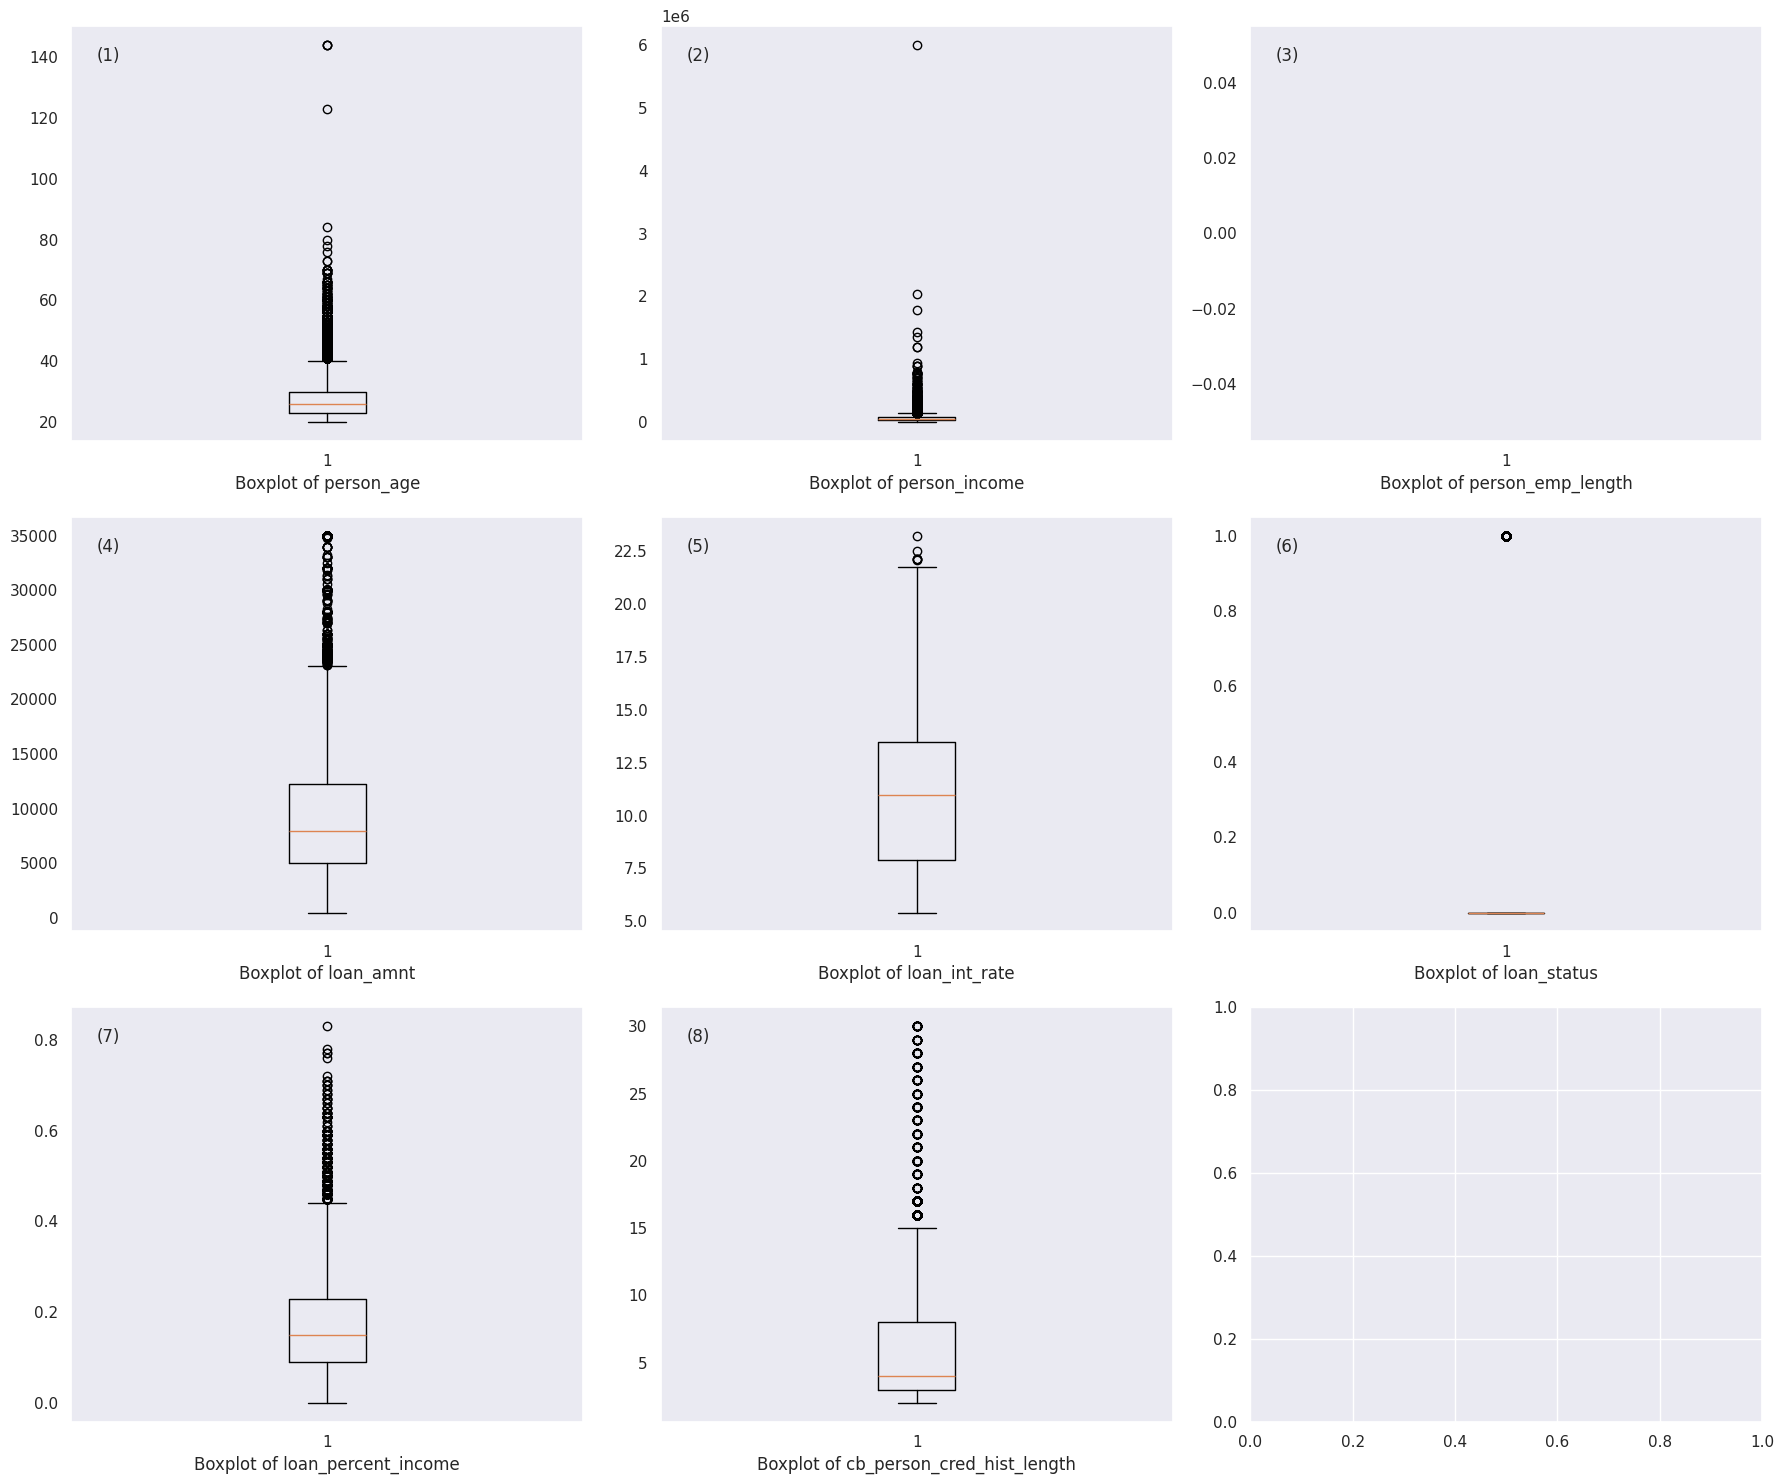

In [23]:
# Create a dataframe to store the  numerical variables and their values
a = cleaned_credit_num.select_dtypes(include=["int64", "float64"])

#put the columns in a list
q = a.columns

#Put the number of columns for the subplot grid to be shown
num_col = 3

#calculate the number of rows needed for the subplot grid
num_row = len(q) // 3 + (len(q) % 3 > 0)

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(18,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a boxplot for each column
for c, column in enumerate(q):
    ax = axes[c] if c < len(q) else None #get the current axis using index c

    if ax is not None:
        #plot the histogram for the current column
        ax.boxplot(a[column])

        #Label the x-axis as value of the column name
        ax.set_xlabel(f"Boxplot of {column}")

        #add text annotation for subplot index
        ax.text(0.05,0.95, f"({c+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

        #Remove grid lines
        ax.grid(False)


#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

Above graph shows that,
1.	Person Age (Boxplot 1):
	•	The data shows most individuals are aged 20 to 40 years, as represented by the box’s main range.

	•	There are numerous outliers above 60 years, with extreme cases going beyond 100 years, which suggests data anomalies or errors.
2.	Person Income (Boxplot 2):
  •	The majority of individuals have incomes clustered at the lower end, with very high outliers extending beyond 1,000,000 units.

	•	This indicates a skewed income distribution, with a small number of individuals earning significantly higher incomes.
3.	Person Employment Length (Boxplot 3):
	•	The boxplot does not display much variation, and the values appear concentrated around lower employment lengths, with minimal spread.

	•	Insight: Most individuals have shorter employment tenures, which might require further cleaning or validation.
4.	Loan Amount (Boxplot 4):
	•	The loan amounts mostly range between 5,000 to 15,000 units, as indicated by the interquartile range.

	•	However, several high outliers go up to 35,000 units, reflecting larger loans taken by a few individuals.
5.	Loan Interest Rate (Boxplot 5):
	•	The boxplot suggests very little variation in loan interest rates, with most values concentrated in a narrow range (likely around 5–20%).

	•	No significant outliers are observed.
6.	Loan Status (Boxplot 6):
	•	The boxplot reflects binary values (0 and 1) for loan status, where the vast majority are 0 (negative status).

	•	A single outlier in value 1 represents a small subset of approved loans.
7.	Loan Percent Income (Boxplot 7):
	•	The majority of values are concentrated between 0.1 and 0.3, indicating that most individuals allocate 10–30% of their income toward loan repayments.

	•	A few outliers exceed 0.5, meaning some individuals dedicate more than half of their income to loans, posing potential financial risk.
8.	Credit History Length (Boxplot 8):
	•	Most individuals have credit histories between 2 and 10 years, with a gradual spread.

	•	There are multiple outliers above 20 years, reflecting individuals with exceptionally long credit histories.

Checking for normality using Q-Q Plots

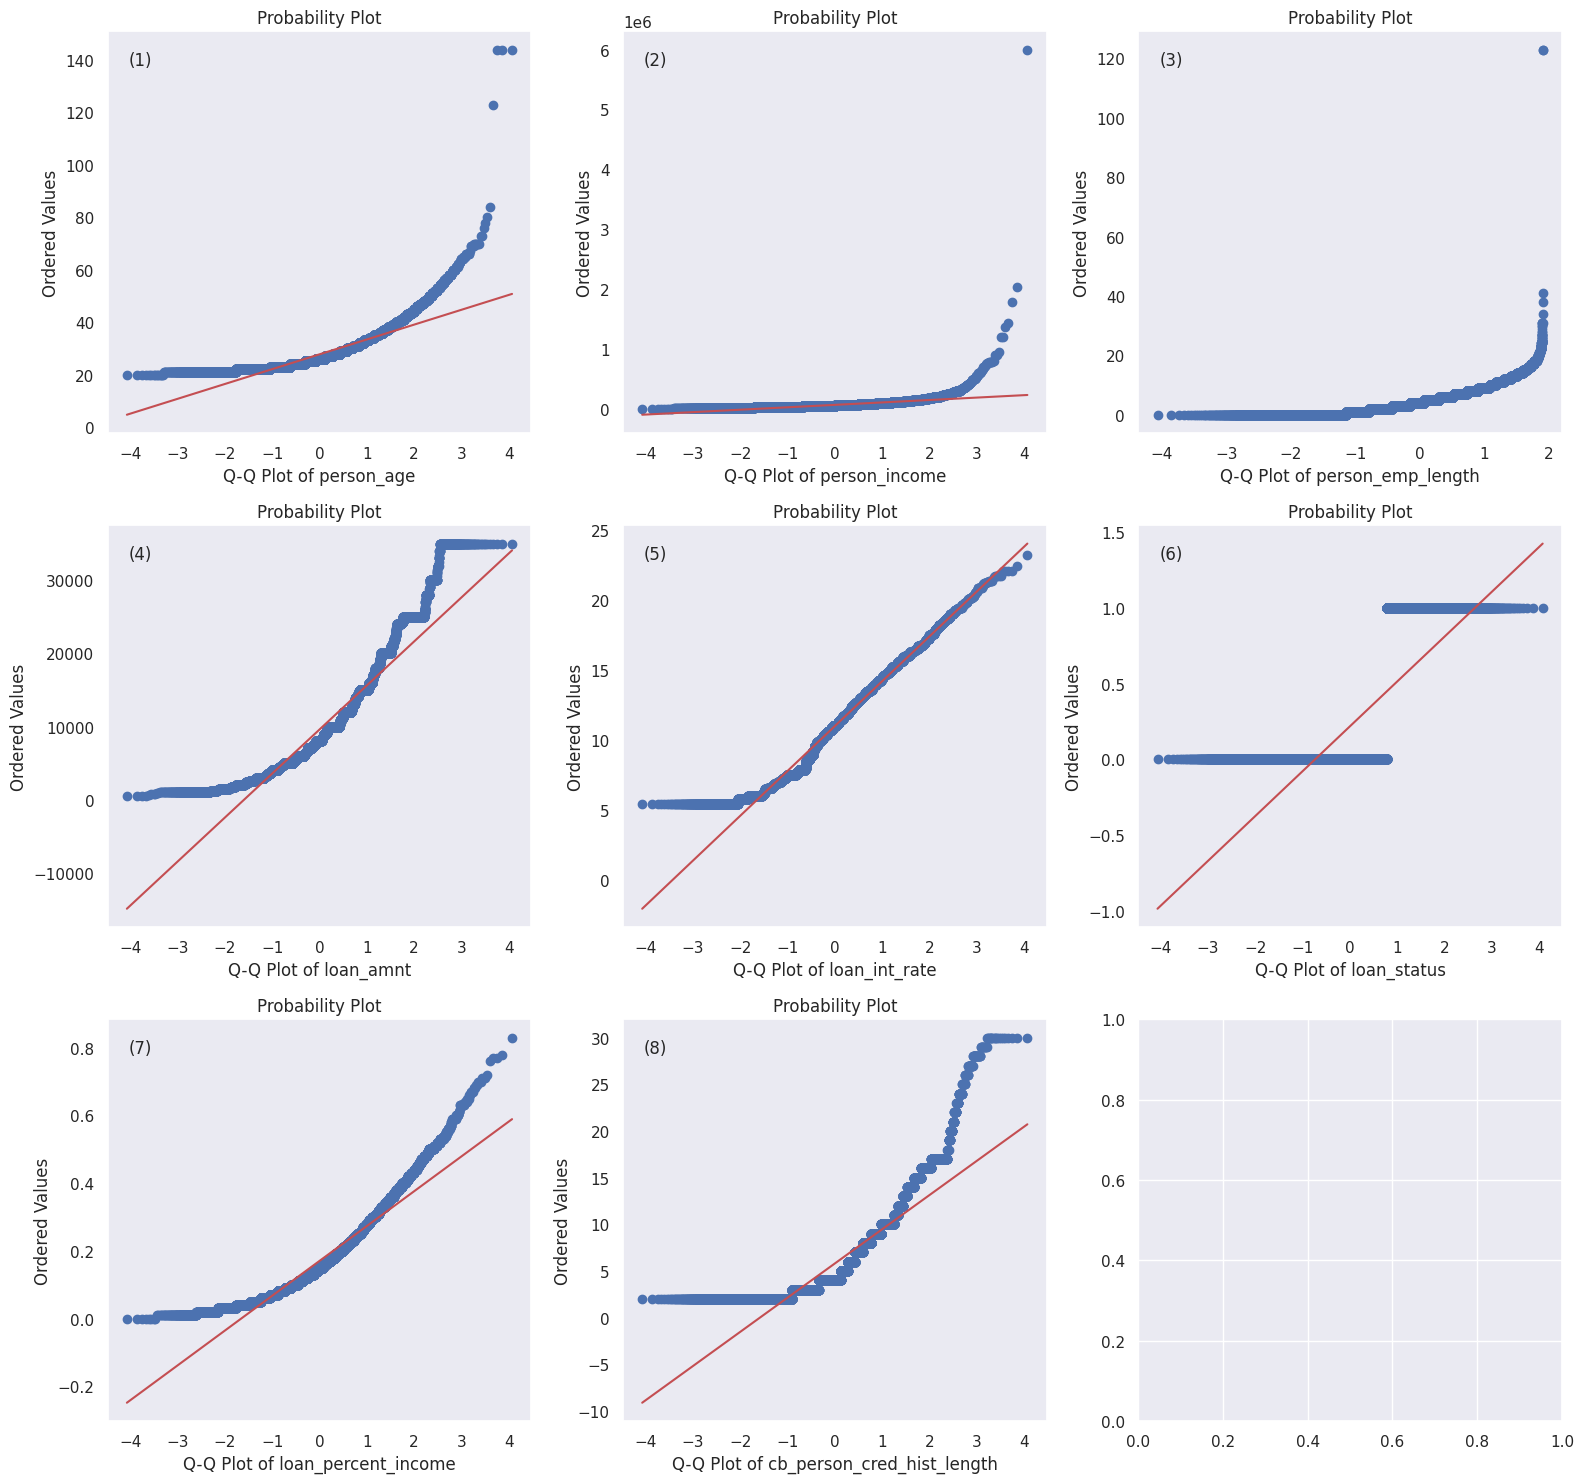

In [24]:
### EDA VISUALIZATIONS
#put the columns in a list
#q_q = cleaned_credit_num.columns # This line includes all columns, some may be non-numeric
q_q = cleaned_credit_num.select_dtypes(include=['number']).columns # Changed to select only numerical columns

#Put the number of columns for the subplot grid to be shown
num_col = 3

#calculate the number of rows needed for the subplot grid
num_row = len(q_q) // 3 + (len(q_q) % 3 > 0)

#Create a figure and axes of subplots
fig, axes = plt.subplots(num_row, num_col, figsize=(16,5*num_row))

#flatten the axes array to easily iterate through
axes = axes.flatten()

#create a for loop to iterate each numerical column and create a histogram for each column
for c, column in enumerate(q_q):
    ax = axes[c] if c < len(q_q) else None #get the current axis using index c

    if ax is not None:
        #Generate a Q-Q Plot
        stats.probplot(cleaned_credit_num[column], dist='norm', plot=ax)

        #Label the x-axis as value of the column name
        ax.set_xlabel(f"Q-Q Plot of {column}")

        #add text annotation for subplot index
        ax.text(0.05,0.95, f"({c+1})", transform=ax.transAxes, fontsize=12, verticalalignment='top')

        #Remove grid lines
        ax.grid(False)


#Adjust the layout to neatly fit the subplots within the figure
plt.tight_layout()
plt.show()  # display the plots

The above Q-Q plot shows:

1.	Q-Q Plot of person_age (Top-Left, Chart 1):
	•	The data deviates significantly from the diagonal line at the upper end, indicating positive skewness.

	•	Outliers (above 100) are visible, suggesting extreme ages that deviate from a normal distribution.
2.	Q-Q Plot of person_income (Top-Center, Chart 2):
	•	The data shows a heavy right skew, with points deviating sharply from the line at higher values.

	•	A few extreme outliers (very high incomes) are present, which causes the distribution to deviate from normality.
3.	Q-Q Plot of person_emp_length (Top-Right, Chart 3):
	•	The data deviates from normality with a clear right skew and outliers at the higher end.

	•	Most employment lengths are concentrated near lower values, with some extreme long employment durations.
4.	Q-Q Plot of loan_amnt (Middle-Left, Chart 4):
	•	The data shows positive skewness with deviations at higher values.

	•	There are clear outliers, indicating that a small number of applicants requested large loan amounts.
5.	Q-Q Plot of loan_int_rate (Middle-Center, Chart 5):
	•	The data aligns closely with the diagonal line, indicating that loan interest rates are approximately normal.

	•	Minimal deviations are visible at both ends, suggesting slight skewness.
6.	Q-Q Plot of loan_status (Middle-Right, Chart 6):
	•	The loan_status variable is binary, causing points to form two distinct horizontal lines.

	•	This confirms that the data does not follow a normal distribution due to its categorical nature.

7.	Q-Q Plot of loan_percent_income (Bottom-Left, Chart 7):
	•	The data shows right skewness, with deviations at the higher end.

	•	This suggests that a small proportion of applicants allocate a significant percentage of their income to loan repayment.
8.	Q-Q Plot of cb_person_cred_hist_length (Bottom-Center, Chart 8):
	•	The data deviates from normality, with noticeable positive skewness and outliers at the upper end.
  
	•	Most credit history lengths are concentrated at lower values, with fewer individuals having very long credit histories.

Checking for Normality Using Shapiro-Wilk Test

In [25]:
#Create a For Loop to iterate through each numerical column
# for col in cleaned_credit_num: # This iterates through all columns, not just numerical
for col in cleaned_credit_num.select_dtypes(include=['number']): # Changed to select only numerical columns
    #perform shapiro test on each column
    stat, p_value= shapiro(cleaned_credit_num[col])

    #Intepret the result
    if p_value > 0.05:
        interpretation = 'The Data is normally distributed (fail to reject H0)'
    else:
        interpretation = 'The Data is  not normally distributed (reject H0)'

    #print the results for all numerical columns
    print(f"Column: {col}")
    print(f"Shapiro-Wilk Statistic: {stat}")
    print(f"p-value: {p_value}")
    print(f"Interpretation: {interpretation}\n")

Column: person_age
Shapiro-Wilk Statistic: 0.8083473605147088
p-value: 4.28668980410045e-101
Interpretation: The Data is  not normally distributed (reject H0)

Column: person_income
Shapiro-Wilk Statistic: 0.42900494489081886
p-value: 7.475922998944229e-131
Interpretation: The Data is  not normally distributed (reject H0)

Column: person_emp_length
Shapiro-Wilk Statistic: nan
p-value: nan
Interpretation: The Data is  not normally distributed (reject H0)

Column: loan_amnt
Shapiro-Wilk Statistic: 0.9073637916315078
p-value: 1.944618397404584e-83
Interpretation: The Data is  not normally distributed (reject H0)

Column: loan_int_rate
Shapiro-Wilk Statistic: 0.9768087144878151
p-value: 1.4056602563340956e-54
Interpretation: The Data is  not normally distributed (reject H0)

Column: loan_status
Shapiro-Wilk Statistic: 0.5102839242834278
p-value: 1.9718453913015755e-126
Interpretation: The Data is  not normally distributed (reject H0)

Column: loan_percent_income
Shapiro-Wilk Statistic: 0.9

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29465.
  res = hypotest_fun_out(*samples, **kwds)


The Shapiro-Wilk test results indicate that all columns tested (e.g., person_age, person_income, loan_amnt, etc.) have p-values < 0.05, leading to the rejection of the null hypothesis (H0) that the data is normally distributed. Additionally, the person_emp_length column returns NaN, suggesting invalid or missing values affecting the test. The warning indicates that the Shapiro-Wilk test may not be reliable for datasets with N > 5000, which is the case here, further confirming the non-normality of the data.